In [36]:
import pandas as pd
import numpy as np


eeg_data = pd.read_csv("/content/sample_data/saved_new_data.csv")

eeg_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.5,508.75,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.5,-175.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.0,-769.50,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.5,-1075.25,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.0,-954.25,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75


In [37]:
# filtering EEG Signals with different types of filters
from scipy.signal import butter, lfilter, filtfilt, iirnotch


In [38]:
fs = 256 # Sampling rate in Hz
lowcut = 0.5 # High-pass filter cutoff frequency
highcut = 40 # Low-pass filter cutoff frequency
notch_freq = 50 # Notch Frequency
notch_quality = 30.0 # Quality factor for notch filter

In [39]:
# Design a Butterworth filter which serves as a bandpass filter
def butter_filter(data, lowcut, highcut, fs, order=5, btype="band"):
    nyquist = 0.5 * fs
    low = lowcut/nyquist
    high = highcut/nyquist
    b, a = butter(order, [low,high], btype=btype)
    y = filtfilt(b, a, data)
    return y

In [40]:
def apply_notch_filter(data, freq, fs, quality):
    w0 = freq / (0.5 * fs)
    b, a = iirnotch(w0, quality)
    y = filtfilt(b, a, data)
    return y


In [41]:
# dropping off Unnamed column
eeg_data = eeg_data.drop(columns="Unnamed: 0")

In [42]:
# Example mapping: Adjust according to your actual electrode layout
channel_map = {
    '0': 'Fp1', '1': 'Fpz', '2': 'Fp2', '3': 'F7', '4': 'F3', '5': 'Fz', '6': 'F4', '7': 'F8',
    '8': 'FC5', '9': 'FC1', '10': 'FC2', '11': 'FC6', '12': 'M1', '13': 'T7', '14': 'C3', '15': 'Cz',
    '16': 'C4', '17': 'T8', '18': 'M2', '19': 'CP5', '20': 'CP1', '21': 'CP2', '22': 'CP6', '23': 'P7',
    '24': 'P3', '25': 'Pz', '26': 'P4', '27': 'P8', '28': 'POz', '29': 'O1', '30': 'Oz', '31': 'O2',
    '32': 'AF7', '33': 'AF3', '34': 'AF4', '35': 'AF8', '36': 'F5', '37': 'F1', '38': 'F2', '39': 'F6',
    '40': 'FT7', '41': 'FC3', '42': 'FC4', '43': 'FT8', '44': 'TP7', '45': 'C5', '46': 'C1', '47': 'C2',
    '48': 'C6', '49': 'TP8', '50': 'CP3', '51': 'CP4', '52': 'P5', '53': 'P1', '54': 'P2', '55': 'P6',
    '56': 'PO5', '57': 'PO3', '58': 'PO4', '59': 'PO6', '60': 'CB1', '61': 'CB2', '62': 'S1', '63': 'S2'
}

# Rename channels
eeg_data.rename(columns=channel_map, inplace=True, index=None)

In [43]:
eeg_data

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P2,P6,PO5,PO3,PO4,PO6,CB1,CB2,S1,S2
0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.50,508.75,563.25,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.50,-175.25,-224.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.00,-769.50,-882.75,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.50,-1075.25,-1227.75,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.00,-954.25,-1086.50,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,-1041.75,-958.75,-945.25,-965.50,-921.50,-923.25,-833.50,-846.75,-819.25,-983.50,...,-1225.50,-1152.25,-1142.25,-1191.00,-1182.25,-1348.75,-1172.50,-1487.00,-8171.25,-8179.00
5001,-1177.50,-1118.25,-1105.00,-1101.50,-1067.00,-1070.75,-969.25,-964.00,-959.25,-1145.75,...,-1035.00,-976.25,-963.50,-1012.25,-1009.25,-1131.25,-985.75,-1255.25,8191.75,8191.75
5002,-695.25,-705.25,-691.25,-651.25,-634.00,-635.25,-566.00,-564.50,-565.75,-700.25,...,-465.00,-447.50,-438.75,-465.00,-462.25,-483.25,-454.75,-597.00,8191.75,8191.75
5003,54.50,-31.50,-30.00,42.00,33.50,33.50,45.50,63.50,49.75,-3.00,...,415.75,369.75,374.75,415.50,412.50,552.75,381.75,454.25,8191.75,8190.75


In [44]:
!pip install mne

In [45]:
filtered_data = butter_filter(eeg_data.values, lowcut, highcut, fs, order=5, btype="band")

In [46]:
filtered_data = apply_notch_filter(filtered_data, notch_freq, fs, notch_quality)

In [47]:
filtered_data

array([[  426.61051133,   479.03547745,   527.1005446 , ...,
         5714.8459547 ,  3179.287748  ,    42.1909464 ],
       [  393.45048748,   471.44732556,   540.33276244, ...,
         5112.47066067,  2844.3807836 ,    46.40604247],
       [  355.44630164,   448.91207215,   531.9682869 , ...,
         4761.4756461 ,  2662.15987815,    76.47343725],
       ...,
       [ -419.92283928,  -485.58201545,  -538.02853102, ...,
        -6092.95682307, -3411.11019513,   -77.84514151],
       [ -393.6027223 ,  -489.89934072,  -565.9001378 , ...,
        -5382.39326874, -3006.22439923,   -59.78139308],
       [ -359.92365021,  -472.77709355,  -563.48480504, ...,
        -4892.89383012, -2738.46683626,   -73.2775515 ]])

In [48]:
import mne

def psd_plot(data, channel_map):

  if isinstance(data, np.ndarray):
    data = pd.DataFrame(data)

  # Select only the columns that are actually mapped (ignores unmapped channels)
  channels_to_use = [channel for channel in channel_map.values() if channel in data.columns]

  # Create an MNE Info object with the channels that we have data for
  info = mne.create_info(ch_names=channels_to_use, sfreq=1000, ch_types='eeg')

  # Create the RawArray with the data from the channels we are using
  raw = mne.io.RawArray(data[channels_to_use].T.to_numpy(), info)

  # Define the montage (electrode positions)
  montage = mne.channels.make_standard_montage('standard_1020')

  # Set the montage, ignoring channels that are not present in the montage
  raw.set_montage(montage, on_missing='ignore')

  # Visualize the data
  raw.plot_psd(fmax=50)  # Showing PSD up to 50 Hz
  # raw.plot_projs_topomap()  # Topomap

Creating RawArray with float64 data, n_channels=64, n_times=5005
    Range : 0 ... 5004 =      0.000 ...     5.004 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


<ipython-input-23-5a5b0d4b25ed>:24: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)  # Showing PSD up to 50 Hz


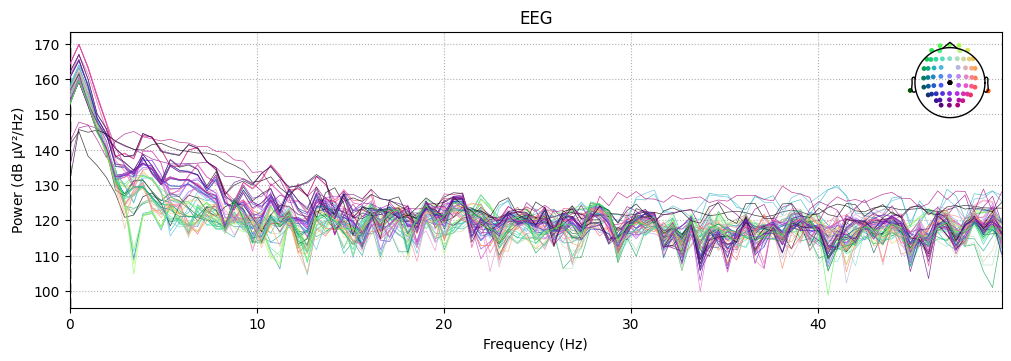

In [26]:
psd_plot(eeg_data, channel_map)

In [49]:
import numpy as np

def remove_artifact(data, threshold=50):
    """
    Removes artifacts from EEG data based on a threshold.

    Args:
      data: A 2D numpy array containing the EEG data (channels x samples).
      threshold: The threshold for artifact detection.

    Returns:
      A 2D numpy array with the artifacts removed.
    """

    # Calculate the mean and standard deviation along the time axis
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)

    # Find the indices of the samples that exceed the threshold
    artifact_indices = np.abs(data - mean) > threshold * std

    # Interpolate the data at the artifact indices
    for channel in range(data.shape[0]):
        # Get indices of artifacts in this channel
        channel_artifacts = np.where(artifact_indices[channel])[0]
        for i in channel_artifacts:
            if i == 0 or i == data.shape[1] - 1:
                # If artifact is at the edge, just use the nearest value
                data[channel, i] = data[channel, i-1] if i != 0 else data[channel, i+1]
            else:
                # Interpolate using neighbors
                data[channel, i] = np.mean([data[channel, i-1], data[channel, i+1]])

    return data

# Assume filtered_data is a 2D array where rows are channels and columns are time points
cleaned_data = remove_artifact(filtered_data)
print(cleaned_data)


[[  426.61051133   479.03547745   527.1005446  ...  5714.8459547
   3179.287748      42.1909464 ]
 [  393.45048748   471.44732556   540.33276244 ...  5112.47066067
   2844.3807836     46.40604247]
 [  355.44630164   448.91207215   531.9682869  ...  4761.4756461
   2662.15987815    76.47343725]
 ...
 [ -419.92283928  -485.58201545  -538.02853102 ... -6092.95682307
  -3411.11019513   -77.84514151]
 [ -393.6027223   -489.89934072  -565.9001378  ... -5382.39326874
  -3006.22439923   -59.78139308]
 [ -359.92365021  -472.77709355  -563.48480504 ... -4892.89383012
  -2738.46683626   -73.2775515 ]]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

def compute_psd(data, fs):
    """
    Compute the power spectral density (PSD) for each channel in the EEG data.

    Args:
        data (np.ndarray): The EEG data, assumed to be shape (channels, samples).
        fs (int): Sampling frequency of the data.

    Returns:
        freqs (np.ndarray): Array of frequency bins.
        psd (np.ndarray): Power spectral density for each channel.
    """
    freqs, psd = welch(data, fs=fs, window='hann', nperseg=1024, scaling='density')
    return freqs, psd

# Example usage:
# Assume 'filtered_data' is your EEG data array and 'fs' is the sampling frequency
freqs, power_data = compute_psd(cleaned_data, fs=256)  # fs needs to be defined based on your data acquisition


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 1024 is greater than input length  = 64, using nperseg = 64
  warnings.warn('nperseg = {0:d} is greater than input length '


In [55]:
def smooth_spectrum(power, window_size=10):
    """
    Apply a simple moving average to smooth the power spectrum.

    Args:
        power (np.ndarray): Power spectrum data.
        window_size (int): The size of the moving average window.

    Returns:
        np.ndarray: Smoothed power spectrum.
    """
    return np.convolve(power, np.ones(window_size) / window_size, mode='same')

# Applying smoothing to each channel's power spectrum
smoothed_power = np.apply_along_axis(smooth_spectrum, 1, power_data)


In [56]:
smoothed_power

array([[6.87242143e+04, 7.70594394e+04, 8.58845708e+04, ...,
        4.36290751e-04, 3.20689949e-04, 2.35044067e-04],
       [5.91867480e+04, 6.63019861e+04, 7.38940179e+04, ...,
        3.53490026e-04, 2.60113959e-04, 1.90861074e-04],
       [5.45442876e+04, 6.07533886e+04, 6.73557004e+04, ...,
        3.04309276e-04, 2.24292904e-04, 1.64859782e-04],
       ...,
       [7.46143307e+04, 8.31936625e+04, 9.21822432e+04, ...,
        4.94588207e-04, 3.63822320e-04, 2.66904795e-04],
       [6.20883487e+04, 6.94554701e+04, 7.73188233e+04, ...,
        3.96319598e-04, 2.91720971e-04, 2.14150077e-04],
       [5.48282722e+04, 6.11517538e+04, 6.79145954e+04, ...,
        3.28729102e-04, 2.42271281e-04, 1.78079395e-04]])

<ipython-input-60-cc62aaaf3afb>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


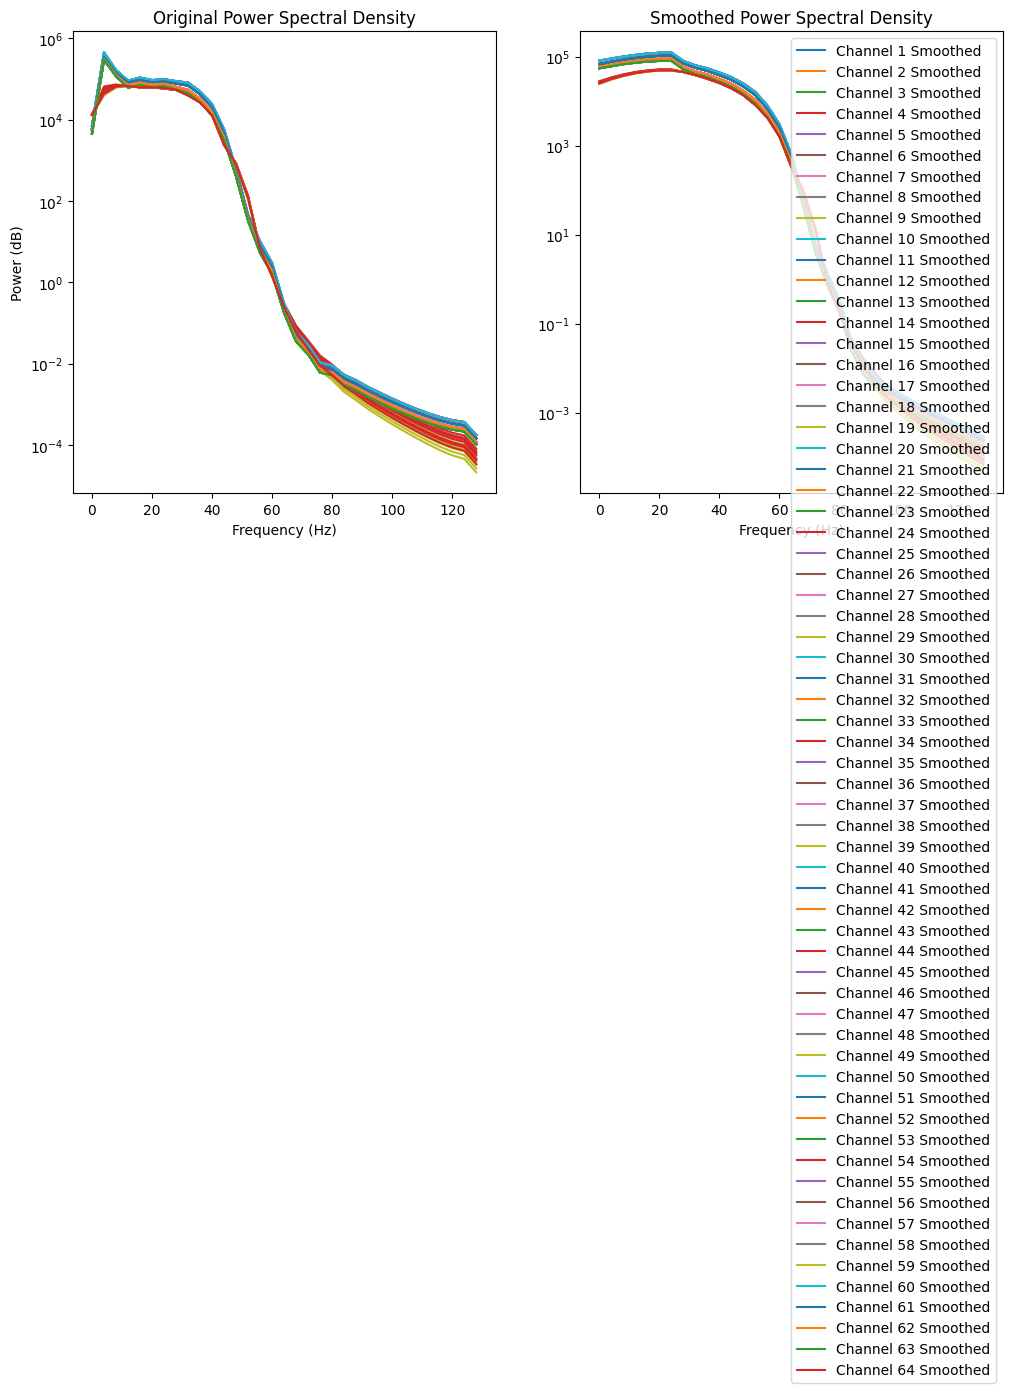

In [60]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Only plot the first few channels to reduce image size
for i in range(min(64, power_data.shape[0])):
    plt.semilogy(freqs, power_data[i], label=f'Channel {i+1} Original')
plt.title('Original Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')

plt.subplot(1, 2, 2)
# Only plot the first few channels to reduce image size
for i in range(min(64, smoothed_power.shape[0])):
    plt.semilogy(freqs, smoothed_power[i], label=f'Channel {i+1} Smoothed')
plt.title('Smoothed Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler

def standardize_data(data):
    """
    Standardizes the EEG data to have zero mean and unit variance across each channel.

    Args:
        data (np.ndarray): EEG data array of shape (channels, samples).

    Returns:
        np.ndarray: Standardized EEG data.
    """
    scaler = StandardScaler()
    # StandardScaler expects shape (samples, features), so transpose the data
    standardized_data = scaler.fit_transform(data.T).T
    return standardized_data

# Example usage:
# Assuming 'filtered_data' is your EEG data array from the previous steps
standardized_data = standardize_data(smoothed_power)


In [62]:
standardized_data

array([[ 1.08304998,  1.30473207,  1.5394436 , ..., -0.7447263 ,
        -0.7447263 , -0.74472631],
       [ 1.1078937 ,  1.32984887,  1.56667729, ..., -0.7383979 ,
        -0.7383979 , -0.7383979 ],
       [ 1.15545457,  1.37012637,  1.59839295, ..., -0.73034514,
        -0.73034514, -0.73034514],
       ...,
       [ 1.11649132,  1.33008149,  1.55386028, ..., -0.74109946,
        -0.74109947, -0.74109947],
       [ 1.1060605 ,  1.325119  ,  1.55893277, ..., -0.74011253,
        -0.74011253, -0.74011254],
       [ 1.13868835,  1.3546142 ,  1.58554274, ..., -0.73351469,
        -0.73351469, -0.73351469]])